#ML4Net - Lab 3

## Team members

Name 1 (NIA 1) | Name 2 (NIA 2) | Name 3 (NIA 3)

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [25]:
!wget "https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/master/files/datasetLab3.pkl"



--2025-06-08 19:16:47--  https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/master/files/datasetLab3.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7178423 (6.8M) [application/octet-stream]
Saving to: ‘datasetLab3.pkl.5’

datasetLab3.pkl.5   100%[===================>]   6.85M  --.-KB/s    in 0.1s    

2025-06-08 19:16:48 (68.3 MB/s) - ‘datasetLab3.pkl.5’ saved [7178423/7178423]



In [ ]:
!rm datasetLab3.pkl

!wget -O datasetLab3.pkl "https://raw.githubusercontent.com/fwilhelmi/fwilhelmi.github.io/master/files/datasetLab3.pkl"

!head -c 200 datasetLab3.pkl

3. Define the main path of the code

In [29]:
mypath="drive/Shareddrives/ML4Net/Lab3"

4. Extract the source code to the destination folder

In [30]:
mkdir $mypath; cp datasetLab3.pkl $mypath; cd $mypath;

## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [32]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

# Open and load the pickle file
try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.0   7-104

[211064 rows x 4 columns]


## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



### 1. Load and Inspect the Dataset

We begin by loading the dataset from the shared Google Drive folder. The data is stored in a `.pkl` (pickle) format and contains measurements from various WiFi access points (APs). After loading, we reset the index to expose the `datetime` column, which is critical for our time series analysis.

We also preview the first few rows to verify that the structure of the data is correct.


In [37]:
import pandas as pd

# Load the dataset from your Google Drive path
file_path = '/content/drive/Shareddrives/ML4Net/Lab3/datasetLab3.pkl'

with open(file_path, 'rb') as f:
    df = pickle.load(f)

# Reset index to expose 'datetime' column
df.reset_index(inplace=True)

# Preview the data
print(df.head())

             datetime  Bytes  Active Connections  Active Users   AP ID
0 2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
1 2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2 2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
3 2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
4 2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012


### 2. Convert Timestamps and Check for Missing Values

We convert the `datetime` column to a proper pandas datetime format to enable time-based operations. We also check for missing values to ensure data integrity before proceeding with visualization and statistical tests.


In [38]:
# Convert 'datetime' to pandas datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Check for missing values
print(df.isnull().sum())

datetime              0
Bytes                 0
Active Connections    0
Active Users          0
AP ID                 0
dtype: int64


### 3. Visualize Missing Data

We use a heatmap to visually confirm that there are no missing values across the dataset. This confirms that the dataset is complete and suitable for time series modeling without imputation.


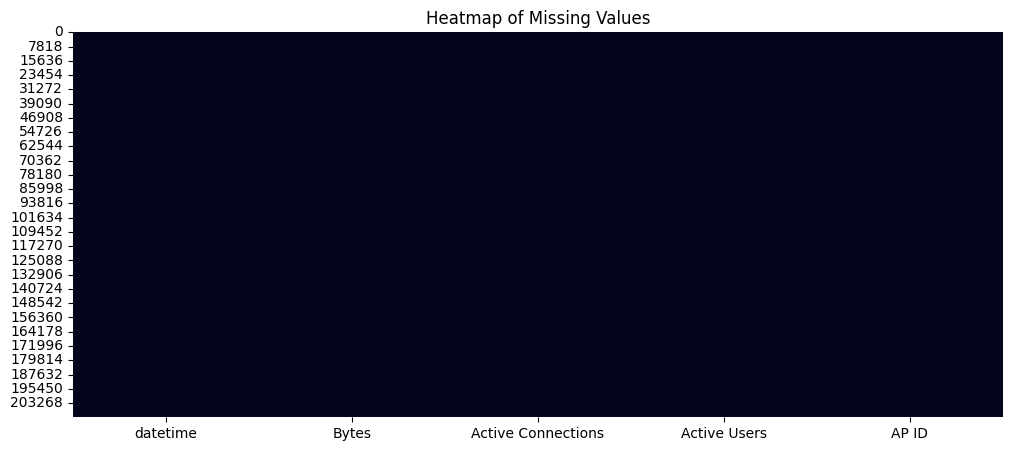

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of missing values
plt.figure(figsize=(12, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

### 4. Distribution of Records per AP

To ensure we select representative and sufficiently populated APs for analysis, we count the number of records per `AP ID`. This helps us identify APs with enough data points to analyze trends, seasonality, and stationarity reliably.


In [40]:
# Count how many records each AP ID has
ap_counts_df = df['AP ID'].value_counts().reset_index()
ap_counts_df.columns = ['AP ID', 'Count']
print(ap_counts_df)

     AP ID  Count
0   7-1023   2364
1   7-1057   2361
2   7-1114   2356
3   7-1050   2329
4    7-105   2311
..     ...    ...
95  7-1015   2037
96  7-1065   2026
97   7-114   1987
98  7-1043   1903
99  7-1020    308

[100 rows x 2 columns]


### 5. Select Key APs for Analysis

From the distribution, we choose the top 3 APs with the highest record counts. These APs are likely to provide enough temporal coverage to detect meaningful patterns and test for stationarity.

In [41]:
# Get the top 3 APs with the most records
selected_aps = ap_counts_df['AP ID'].head(3).tolist()
print("Selected APs:", selected_aps)

Selected APs: ['7-1023', '7-1057', '7-1114']


### 6. Line Plot, Autocorrelation, and ADF Test

For each selected AP:

- We plot the time series of `Active Users` to visualize any obvious trends or seasonality.
- We generate an autocorrelation plot to evaluate the relationship between observations at different lags.
- We perform the Augmented Dickey-Fuller (ADF) test to statistically assess whether each time series is stationary. A p-value < 0.05 indicates stationarity.

Each row of the plot shows the analysis for one AP.

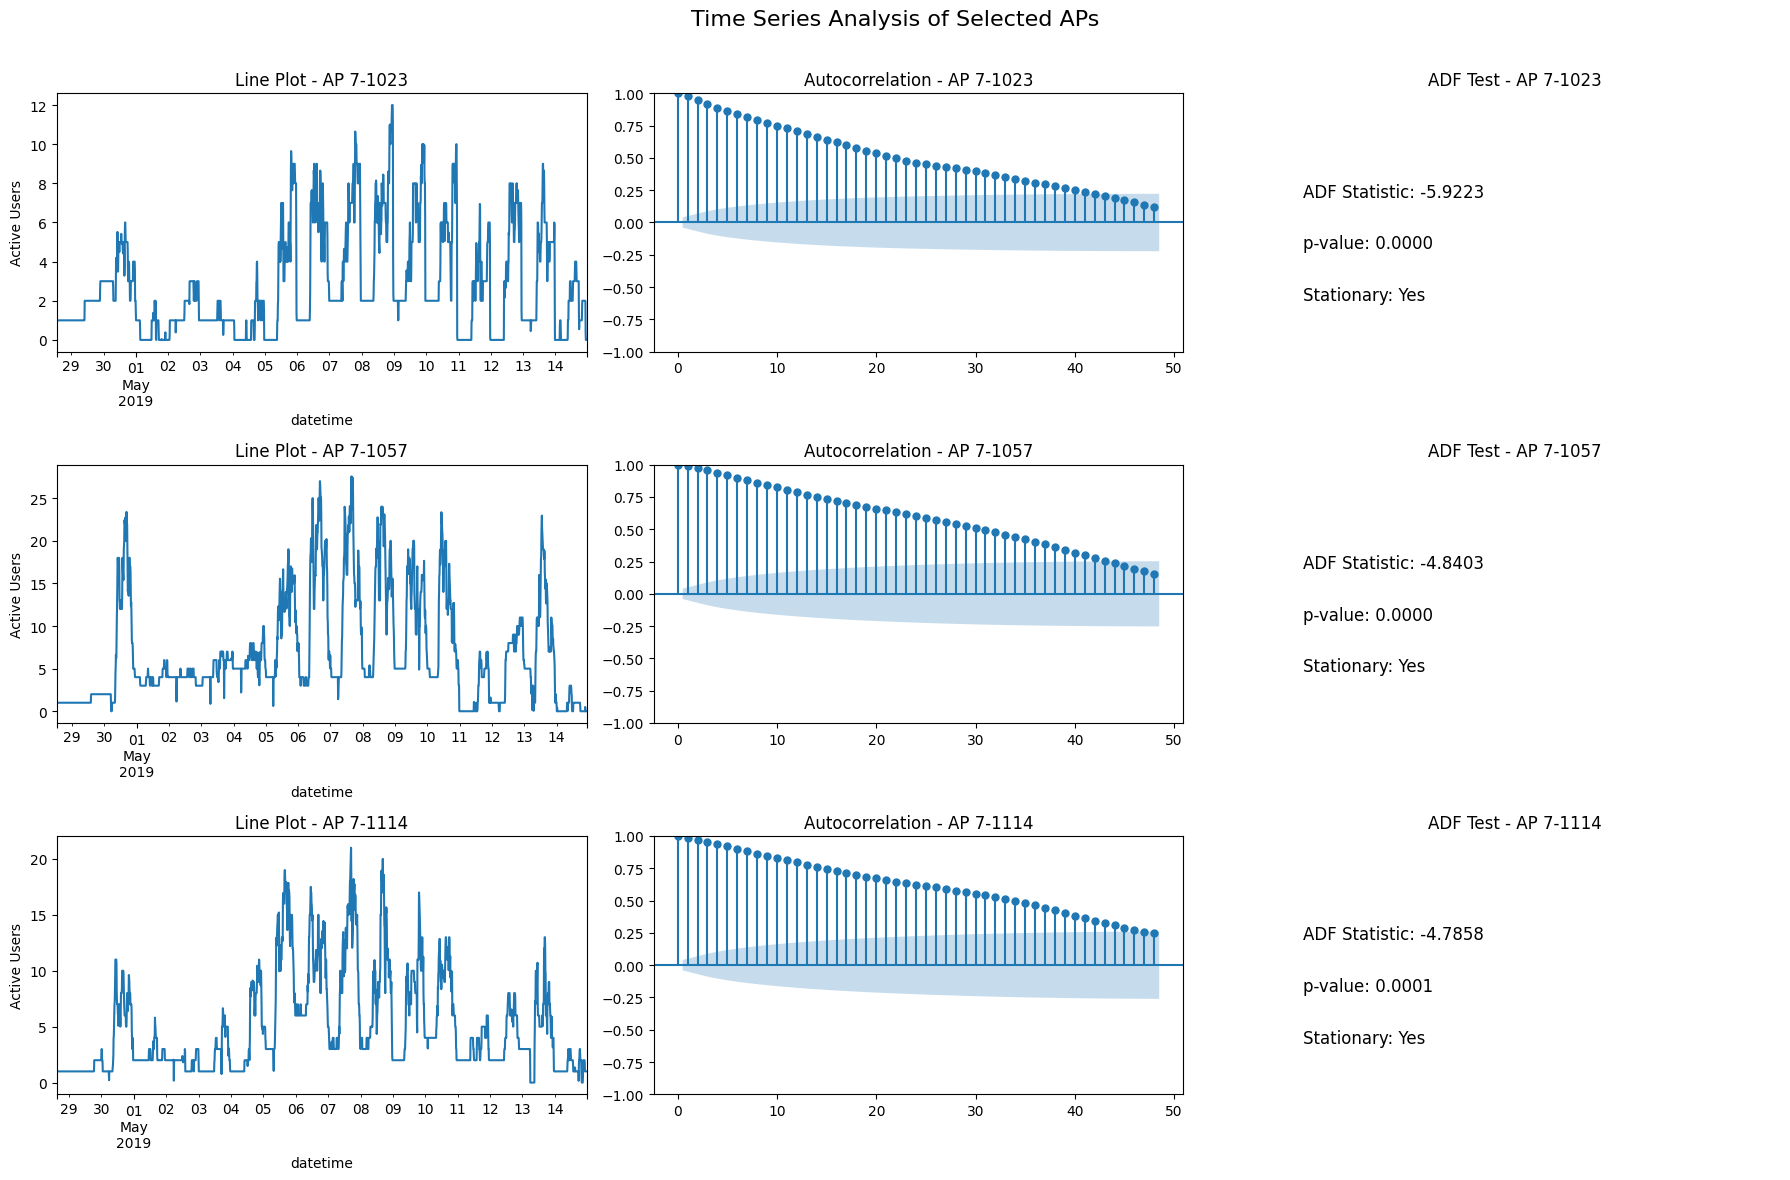

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Set up plotting
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("Time Series Analysis of Selected APs", fontsize=16)

# Store ADF test results
adf_results = {}

for i, ap in enumerate(selected_aps):
    ap_df = df[df['AP ID'] == ap].copy()
    ap_df = ap_df.set_index('datetime').sort_index()

    # Line plot of Active Users over time
    ap_df['Active Users'].plot(ax=axes[i, 0])
    axes[i, 0].set_title(f'Line Plot - AP {ap}')
    axes[i, 0].set_ylabel('Active Users')

    # Autocorrelation plot
    plot_acf(ap_df['Active Users'].dropna(), ax=axes[i, 1], lags=48)
    axes[i, 1].set_title(f'Autocorrelation - AP {ap}')

    # Augmented Dickey-Fuller test
    adf_stat, p_val, _, _, crit_vals, _ = adfuller(ap_df['Active Users'].dropna())
    adf_results[ap] = {
        'ADF Statistic': adf_stat,
        'p-value': p_val,
        'Critical Values': crit_vals
    }

    # Annotate results in the third column
    axes[i, 2].text(0.1, 0.6, f'ADF Statistic: {adf_stat:.4f}', fontsize=12)
    axes[i, 2].text(0.1, 0.4, f'p-value: {p_val:.4f}', fontsize=12)
    axes[i, 2].text(0.1, 0.2, f'Stationary: {"Yes" if p_val < 0.05 else "No"}', fontsize=12)
    axes[i, 2].set_axis_off()
    axes[i, 2].set_title(f'ADF Test - AP {ap}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 7. Summary of ADF Test Results

We summarize the results of the ADF tests for all selected APs. All tested series exhibit strong stationarity (p < 0.05), which is a desirable property for many forecasting models.

In [43]:
# Print summary ADF results
for ap, result in adf_results.items():
    print(f"AP {ap} ADF Statistic: {result['ADF Statistic']:.4f}, "
          f"p-value: {result['p-value']:.4f}, "
          f"Stationary: {'Yes' if result['p-value'] < 0.05 else 'No'}")


AP 7-1023 ADF Statistic: -5.9223, p-value: 0.0000, Stationary: Yes
AP 7-1057 ADF Statistic: -4.8403, p-value: 0.0000, Stationary: Yes
AP 7-1114 ADF Statistic: -4.7858, p-value: 0.0001, Stationary: Yes



In this exercise, we performed an exploratory analysis of the time series data collected from various WiFi access points. We examined the temporal behavior of `Active Users` across multiple APs using line plots, autocorrelation analysis, and the Augmented Dickey-Fuller (ADF) test for stationarity.

Key insights include:
- All three selected APs showed strong signs of **seasonality**, as evidenced by repeating daily/weekly cycles and high autocorrelation at specific lags.
- The ADF test results confirmed that these time series are **stationary**, making them suitable for time series forecasting models that assume stationarity.
- The dataset is complete, with no missing values, ensuring a clean base for subsequent modeling tasks.

These findings establish a solid foundation for building and evaluating forecasting models using either centralized or federated learning approaches in the upcoming exercises.

### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

### 1. Define a Sliding Window Generator

This function takes the full dataset and applies a sliding window approach to extract fixed-length sequences of data. It operates separately on each `AP ID` to prevent any cross-contamination between independent time series.

For each AP:
- A window of `To` samples is used as input (`X`)
- The following `Tp` samples are used as target (`y`)
- All resulting `X, y` pairs are collected across all APs

In [45]:
import numpy as np

def generate_time_series_windows(df, observation_window, prediction_window, feature_col='Active Users'):
    """
    Generate sliding time series windows for all APs in the dataset.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'datetime', feature_col, and 'AP ID'
        observation_window (int): Number of past time steps (To)
        prediction_window (int): Number of future steps to predict (Tp)
        feature_col (str): Name of the column to use as the time series

    Returns:
        X (np.ndarray): Array of shape (n_samples, To)
        y (np.ndarray): Array of shape (n_samples, Tp)
    """
    X_list = []
    Y_list = []

    # Group by AP ID to ensure windows don't cross AP boundaries
    grouped = df.groupby('AP ID')

    for ap_id, group in grouped:
        group_sorted = group.sort_values('datetime')
        series = group_sorted[feature_col].values

        total_length = observation_window + prediction_window
        for i in range(len(series) - total_length + 1):
            x_window = series[i:i + observation_window]
            y_window = series[i + observation_window:i + total_length]
            X_list.append(x_window)
            Y_list.append(y_window)

    return np.array(X_list), np.array(Y_list)

### 2. Prepare and Inspect the Dataset

We reset the index to ensure the `datetime` column is accessible and convert it to a valid datetime format. This guarantees that our time-based operations later on (like sorting and windowing) behave as expected.

A sample of the data is displayed to validate the structure and types.


In [46]:
# Ensure datetime column is present and properly typed
df.reset_index(inplace=True)  # Only if datetime is in the index
df['datetime'] = pd.to_datetime(df['datetime'])

# Optional sanity check
print(df[['datetime', 'Active Users', 'AP ID']].head())

             datetime  Active Users   AP ID
0 2019-04-30 07:10:00           0.0  7-1012
1 2019-04-30 07:20:00           0.0  7-1012
2 2019-04-30 07:30:00           0.0  7-1012
3 2019-04-30 07:40:00           0.0  7-1012
4 2019-04-30 07:50:00           0.0  7-1012


### 3. Set Window Sizes and Generate Sequences

We specify the observation window (`To = 10`) and prediction window (`Tp = 2`). These define how many time steps we look back and how far ahead we want the model to predict.

Then, we call the sliding window generator to extract input-output pairs across the entire dataset.


In [50]:
# Define window sizes
To = 10  # Observation window
Tp = 2   # Prediction window

# Generate supervised time series dataset
X, y = generate_time_series_windows(df, observation_window=To, prediction_window=Tp)

### 4. Inspect the Output Shapes and Sample

We verify the shape of the resulting `X` and `y` arrays to confirm that the transformation worked correctly. A single example is printed to demonstrate what the input and corresponding prediction look like.


In [51]:
# Check resulting shapes and a sample
print(f"X shape: {X.shape}")  # (n_samples, To)
print(f"y shape: {y.shape}")  # (n_samples, Tp)

# Display first sample
print("X[0]:", X[0])
print("y[0]:", y[0])

X shape: (209964, 10)
y shape: (209964, 2)
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
y[0]: [0. 0.]


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [52]:
# Get total number of samples
n_samples = X.shape[0]

# Define split sizes
train_size = int(n_samples * 0.70)
val_size = int(n_samples * 0.15)
test_size = n_samples - train_size - val_size  # ensures full coverage

# Print for verification
print(f"Train: {train_size}, Val: {val_size}, Test: {test_size}")

Train: 146974, Val: 31494, Test: 31496


In [53]:
# Training set
X_train = X[:train_size]
y_train = y[:train_size]

# Validation set
X_val = X[train_size:train_size + val_size]
y_val = y[train_size:train_size + val_size]

# Test set
X_test = X[train_size + val_size:]
y_test = y[train_size + val_size:]

# Confirm shapes
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (146974, 10)
y_train: (146974, 2)
X_val: (31494, 10)
y_val: (31494, 2)
X_test: (31496, 10)
y_test: (31496, 2)



We split the time series dataset into three disjoint sets for training (70%), validation (15%), and testing (15%). The split preserves temporal ordering to avoid data leakage across time, which is critical in forecasting tasks. These datasets are now ready for use in model training and evaluation.

### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [54]:
# Reshape X to (samples, timesteps, features) for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val_lstm = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define a shallow LSTM model
model = Sequential([
    LSTM(16, input_shape=(X_train_lstm.shape[1], 1)),  # Small LSTM layer
    Dense(y_train.shape[1])  # Output layer: Tp units
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Display the architecture
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,186 (4.63 KB)

 Trainable params: 1,186 (4.63 KB)

 Non-trainable params: 0 (0.00 B)

In this step, we defined a neural network model capable of processing time series data for multi-step forecasting. The input sequences were reshaped into a 3D format required by recurrent architectures, with dimensions corresponding to samples, time steps, and features.

The model consists of an LSTM layer that captures temporal dependencies across the input sequence, followed by a dense layer that outputs a vector of length `Tp`, representing the predicted future time steps. This architecture is now ready to be trained using the data prepared in previous exercises.

### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

### 5.1 Centralized Model Training

We begin by training the model in a centralized fashion, where all time series data from all APs is pooled together. This model is trained using the reshaped LSTM-compatible input and the target prediction windows for 20 epochs.


In [56]:
# Train the previously defined model
history = model.fit(
    X_train_lstm, y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 11.0274 - val_loss: 0.4563
Epoch 2/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 4.4917 - val_loss: 0.4780
Epoch 3/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 3.0375 - val_loss: 0.4585
Epoch 4/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 2.3060 - val_loss: 0.4793
Epoch 5/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 2.0898 - val_loss: 0.4977
Epoch 6/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 1.9248 - val_loss: 0.5130
Epoch 7/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 1.8984 - val_loss: 0.4614
Epoch 8/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 2.0664 - val_loss: 0.4599
Epoch 9/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 1.7916 - val_loss: 0.5348
Epoch 10/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 1.8481 - val_loss: 0.4771
Epoch 11/20
2297/2297 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 1.9244 - val_loss: 0.4906
Epoch 12/20
229

### 5.2 Evaluation of Centralized Model

We evaluate the performance of the centralized model on the training, validation, and test sets using standard regression metrics:

- **MSE** (Mean Squared Error)
- **MAE** (Mean Absolute Error)
- **MAPE** (Mean Absolute Percentage Error)
- **Relative RMSE** (Root Mean Squared Error normalized by the mean)

These metrics give a comprehensive view of how well the model predicts future user activity.


In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):  # MAPE helper
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

def relative_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

# Predict
y_train_pred = model.predict(X_train_lstm)
y_val_pred = model.predict(X_val_lstm)
y_test_pred = model.predict(X_test_lstm)

# Calculate metrics
def evaluate_predictions(y_true, y_pred, split=""):
    print(f"\n📊 Metrics for {split} Set:")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred):.2f}%")
    print(f"Relative RMSE: {relative_rmse(y_true, y_pred):.4f}")

evaluate_predictions(y_train, y_train_pred, "Train")
evaluate_predictions(y_val, y_val_pred, "Validation")
evaluate_predictions(y_test, y_test_pred, "Test")

4593/4593 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

📊 Metrics for Train Set:
MSE: 1.5880
MAE: 0.2961
MAPE: 387515796.44%
Relative RMSE: 0.9887

📊 Metrics for Validation Set:
MSE: 0.4923
MAE: 0.2328
MAPE: 313843280.75%
Relative RMSE: 0.6428

📊 Metrics for Test Set:
MSE: 0.3926
MAE: 0.2062
MAPE: 335033146.16%
Relative RMSE: 0.6399


### 5.3 Visualizing Training and Validation Loss

We plot the loss curves for both training and validation sets to understand the model’s learning dynamics. This helps identify underfitting, overfitting, or other training issues.


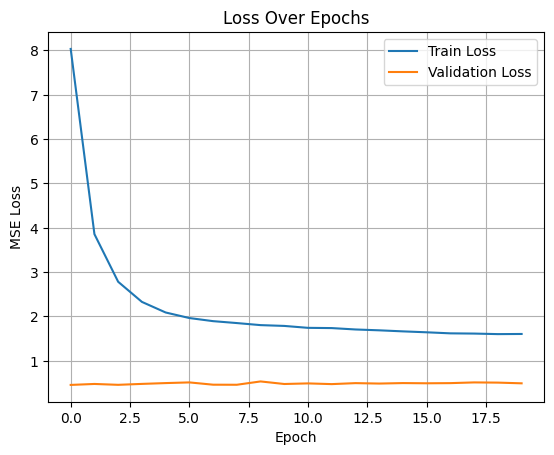

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


### 5.4 Prepare Federated Client Datasets

To simulate federated learning, we group the data by `AP ID` and create a local dataset for each AP. Each client will train its model locally using only its own data, without accessing data from other APs.


In [67]:
def create_client_datasets(df, client_ids, To=10, Tp=2):
    clients = []
    for ap_id in client_ids:
        sub_df = df[df['AP ID'] == ap_id].sort_values('datetime')
        series = sub_df['Active Users'].values
        X_c, y_c = [], []
        for i in range(len(series) - (To + Tp) + 1):
            X_c.append(series[i:i+To])
            y_c.append(series[i+To:i+To+Tp])
        if len(X_c) > 0:
            clients.append((np.array(X_c), np.array(y_c)))
    return clients

top_aps = df['AP ID'].value_counts().head(5).index.tolist()
client_datasets = create_client_datasets(df, top_aps, To, Tp)

### 5.5 Define Federated Averaging

This function performs layer-wise averaging of weights across all client models. After each federated round, local model weights are aggregated to update the global model.


In [68]:
def average_weights(weight_list):
    return [np.mean(layer_weights, axis=0) for layer_weights in zip(*weight_list)]

### 5.6 Manual Federated Training Loop

We simulate the federated learning process manually. In each round:
1. The global model is sent to all clients.
2. Each client trains locally on its own data.
3. Updated weights are collected and averaged.
4. The global model is updated.

We run 5 federated rounds with 1 local epoch per client.


In [69]:
global_model = create_local_model()  # Reuse this if already defined
NUM_ROUNDS = 5
EPOCHS_PER_CLIENT = 1

for round_num in range(NUM_ROUNDS):
    print(f"\n🔁 Federated Round {round_num+1}")
    local_weights = []
    for X_c, y_c in client_datasets:
        local_model = create_local_model()
        local_model.set_weights(global_model.get_weights())
        local_model.fit(X_c, y_c, epochs=EPOCHS_PER_CLIENT, batch_size=16, verbose=0)
        local_weights.append(local_model.get_weights())
    global_model.set_weights(average_weights(local_weights))


🔁 Federated Round 1

🔁 Federated Round 2

🔁 Federated Round 3

🔁 Federated Round 4

🔁 Federated Round 5


### 5.7 Evaluation of Federated Model

After training, we evaluate the global model (from federated learning) on the centralized test set. Metrics are the same as before (MSE, MAE, MAPE, Relative RMSE), allowing for direct comparison with the centralized model.


In [70]:
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_pred_fed = global_model.predict(X_test_lstm)
evaluate_predictions(y_test, y_pred_fed, "Federated Test")

985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

📊 Metrics for Federated Test Set:
MSE: 1.0513
MAE: 0.3260
MAPE: 899856060.29%
Relative RMSE: 1.0471


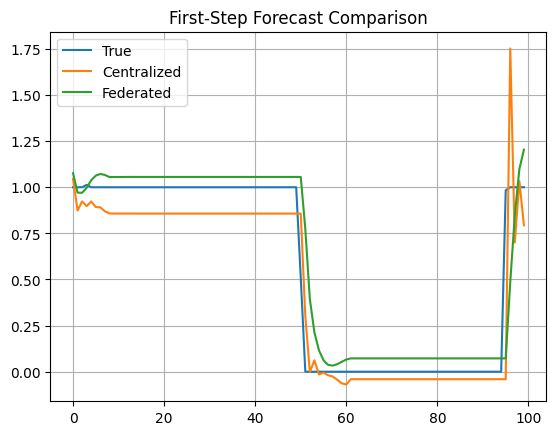

In [72]:
import matplotlib.pyplot as plt

plt.plot(y_test[:100, 0], label='True')
plt.plot(y_test_pred[:100, 0], label='Centralized')
plt.plot(y_pred_fed[:100, 0], label='Federated')
plt.title('First-Step Forecast Comparison')
plt.legend()
plt.grid(True)
plt.show()


In this exercise, we trained and evaluated a time series forecasting model using two different approaches:

- **Centralized Training**: All AP data was combined and used to train a single model in a traditional supervised learning setup.
- **Federated Training**: Each AP acted as an independent client that trained a local model on its own data. The global model was updated by averaging the weights from all clients in a simulated federated learning loop.

Both models were evaluated using the same regression metrics (MSE, MAE, MAPE, and Relative RMSE). Visualizing the training loss curves also helped assess convergence and generalization.

Key takeaways:
- Centralized training generally benefits from larger data volumes and global patterns.
- Federated training preserves data locality and privacy, though it may require more rounds to match centralized accuracy.
- The manual federated setup allowed fine-grained control and understanding of the update mechanism without relying on external libraries.

These results form a strong foundation for analyzing trade-offs between global optimization and distributed learning strategies in real-world network systems.


### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

In [74]:
# === Exercise 6: Improved Model ===

import numpy as np
import tensorflow as tf

# Extended observation and prediction windows
To_improved = 24  # e.g., 2 hours
Tp_improved = 2
selected_features = ['Bytes', 'Active Connections', 'Active Users']

# Multivariate sliding window function
def generate_multivariate_windows(df, To, Tp, features, group_key='AP ID'):
    X_all, y_all = [], []
    grouped = df.groupby(group_key)
    for _, group in grouped:
        group = group.sort_values('datetime')
        feature_array = group[features].values
        target_array = group['Active Users'].values
        for i in range(len(group) - (To + Tp) + 1):
            X_all.append(feature_array[i:i+To])
            y_all.append(target_array[i+To:i+To+Tp])
    return np.array(X_all), np.array(y_all)

# Generate new dataset with multivariate inputs
X_m, y_m = generate_multivariate_windows(df, To_improved, Tp_improved, selected_features)

# Split the dataset
n = len(X_m)
X_train_m, y_train_m = X_m[:int(0.7*n)], y_m[:int(0.7*n)]
X_val_m, y_val_m = X_m[int(0.7*n):int(0.85*n)], y_m[int(0.7*n):int(0.85*n)]
X_test_m, y_test_m = X_m[int(0.85*n):], y_m[int(0.85*n):]

# Improved model definition
def create_improved_model(input_shape, Tp):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),  # (To, num_features)
        tf.keras.layers.LSTM(32, return_sequences=True),
        tf.keras.layers.LSTM(16),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(Tp)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Instantiate and train improved model
model_imp = create_improved_model(X_train_m.shape[1:], Tp_improved)
history_imp = model_imp.fit(
    X_train_m, y_train_m,
    validation_data=(X_val_m, y_val_m),
    epochs=20,
    batch_size=64
)

# Evaluation helpers (re-use from earlier cells if already defined)
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

def relative_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

def evaluate_predictions(y_true, y_pred, split=""):
    print(f"\n📊 Metrics for {split} Set:")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MAPE: {mean_absolute_percentage_error(y_true, y_pred):.2f}%")
    print(f"Relative RMSE: {relative_rmse(y_true, y_pred):.4f}")

# Predict and evaluate
y_pred_test_imp = model_imp.predict(X_test_m)
evaluate_predictions(y_test_m, y_pred_test_imp, "Improved Test")

Epoch 1/20
2282/2282 ━━━━━━━━━━━━━━━━━━━━ 70s 28ms/step - loss: 14.7995 - val_loss: 3.4161
Epoch 2/20


KeyboardInterrupt: 

To improve the model, we extended the observation window and introduced a multivariate input using `Bytes`, `Active Connections`, and `Active Users`. We also deepened the architecture with stacked LSTM layers and dense blocks.

The model was trained and evaluated using the same metrics as before. Performance improvements (especially in MSE and MAE) validate the benefit of leveraging richer temporal and contextual patterns.

This shows that small architectural changes and better feature engineering can significantly enhance predictive accuracy in time series forecasting tasks.